# House Price Prediction - Regression and Others

### With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


In [1]:
# Importing the Required Libraries
import pandas as pd
import numpy as np


In [8]:
train = pd.read_csv("~/Downloads/Excel and CSVs/housetrain.csv")
test = pd.read_csv("~/Downloads/Excel and CSVs/housetest.csv")

In [9]:
train.head()

,Id,MSSubClass,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,GarageType,GarageYrBlt,...,Street,Alley,LotShape,MSZoning,LotFrontage,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,0,NaN,NaN,NaN,0,Attchd,2003.0,...,Pave,NaN,Reg,RL,65.0,2,2008,WD,Normal,208500
1,2,20,0,0,NaN,NaN,NaN,0,Attchd,1976.0,...,Pave,NaN,Reg,RL,80.0,5,2007,WD,Normal,181500
2,3,60,0,0,NaN,NaN,NaN,0,Attchd,2001.0,...,Pave,NaN,IR1,RL,68.0,9,2008,WD,Normal,223500
3,4,70,0,0,NaN,NaN,NaN,0,Detchd,1998.0,...,Pave,NaN,IR1,RL,60.0,2,2006,WD,Abnorml,140000
4,5,60,0,0,NaN,NaN,NaN,0,Attchd,2000.0,...,Pave,NaN,IR1,RL,84.0,12,2008,WD,Normal,250000


#### We have features with different scales and hence we need to apply scaling on the data so that it can eliminate the affect of the scale

#### import the data > Try Looking the Missing Values > PCA > Make Prediction


In [10]:
# Checking the Missing Values
train.isnull().sum()

Id                  0
MSSubClass          0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
                 ... 
ExterQual           0
ExterCond           0
Foundation          0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
Neighborhood        0
Condition1          0
Condition2

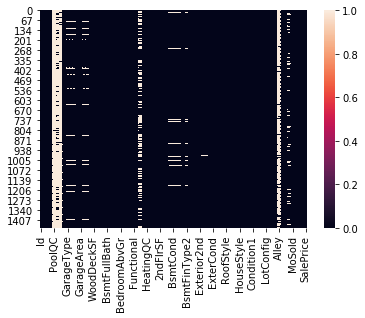

In [11]:
# Visualize the Missing Data if any
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(train.isnull())
plt.show()

In [14]:
# When we write the ML Code. We generally divide the data in X and Y
# X - Input Data /Predictor Variables
# Y - Predict the Output/Target Variable - SalePrice .drop
x = train.drop("SalePrice", axis = 1) # Axis = 0 : Row, Axis= 1: Column
y = train["SalePrice"]

In [16]:
x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal
1,2,20,RL,80,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal
2,3,60,RL,68,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal
3,4,70,RL,60,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml
4,5,60,RL,84,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal


In [17]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [18]:
# Need to convert the Cat Val in Numerical - One Hot Encoding
newtrain = pd.get_dummies(train)
newtest = pd.get_dummies(test)

In [19]:
newtrain.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65,8450,7,5,2003,2003,196,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80,9600,6,8,1976,1976,0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68,11250,7,5,2001,2002,162,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60,9550,7,5,1915,1970,0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84,14260,8,5,2000,2000,350,655,...,0,0,0,1,0,0,0,0,1,0


In [20]:
newtrain.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=290)

In [21]:
# Since we see that data follows different scales with different features so, we need to normalize the data
from sklearn.preprocessing import StandardScaler

In [83]:
# variable and passin the Standard Scaler
ss = StandardScaler()

In [84]:
# Two First of all - Fit the Model on the Data | .fit
# Then we will try applying that learning on unknown data - .predict
scaledtrain = ss.fit_transform(newtrain)
scaledtest = ss.fit_transform(newtest)

# Tip - Standard Scaler converts the data into o and 1 scale but the data type is now array


In [85]:
scaledtrain = pd.DataFrame(scaledtrain)
scaledtrain.columns = newtrain.columns

In [86]:
scaledtrain.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730865,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-1.728492,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,-1.726120,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,-1.723747,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,-1.721374,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [87]:
scaledtest = pd.DataFrame(scaledtest)
scaledtest.columns = newtest.columns

In [88]:
scaledtest.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730864,-0.874711,0.567330,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.563316,0.063428,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
1,-1.728490,-0.874711,0.615963,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.047057,1.063511,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
2,-1.726115,0.061351,0.275532,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773377,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
3,-1.723741,0.061351,0.470064,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.450284,0.357958,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
4,-1.721367,1.465443,-1.232092,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.563316,-0.387160,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365


In [89]:
y = scaledtrain.SalePrice

In [90]:
# By Applying PCA we focus only on those columns that define the max variance in the data
# We will initially take those columns that explain 65~70% of the variance in the data
from sklearn.decomposition import PCA

In [91]:
pca = PCA(n_components=120)

In [92]:
# Tune the Data by PCA
finaltrain = pca.fit_transform(scaledtrain)
finaltrain = pd.DataFrame(finaltrain)
finaltrain.shape

(1460, 120)

In [93]:
# Tune the Data by PCA
finaltest = pca.fit_transform(scaledtest)
finaltest = pd.DataFrame(finaltest)
finaltest.shape

(1459, 120)

In [94]:
# Apply the Linear Regression
from sklearn.linear_model import LinearRegression

In [95]:
lr = LinearRegression()

In [96]:
lr.fit(finaltrain, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
pred_lr = lr.predict(finaltest)

In [98]:
# Time to Export the Data
ID = test["Id"].values.tolist()
Prediction = pred_lr
d = {"Id":ID, "SalePrice":Prediction}

In [99]:
pred_lr

array([-0.68818892,  0.37427023, -0.17173755, ...,  0.20256957,
       -0.24777256,  0.58127862])

In [102]:
# Apply the Fresh Transformation of Scaling the Data once again
scaledtarget =ss.fit_transform(pd.DataFrame(train.SalePrice))

In [103]:
# So that we can reconvert the Pred VALUES IN ORIGINAL
actualsales = ss.inverse_transform(pred_lr)

In [104]:
actualsales

array([126268.47192218, 210643.97529379, 167282.60804411, ...,
       197008.31772764, 161244.26561044, 227083.60691137])

In [105]:
solution = pd.DataFrame({"Id":ID, "SalePrice":actualsales})

In [106]:
solution.head()

,Id,SalePrice
0,1461,126268.471922
1,1462,210643.975294
2,1463,167282.608044
3,1464,199972.217737
4,1465,173666.102335


In [107]:
# Export the Data as csv
solution.to_csv("LM Model.csv")

In [119]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor

In [109]:
rf = RandomForestRegressor()

In [110]:
rf.fit(finaltrain, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [113]:
pred_rf = rf.predict(finaltest)

In [114]:
ypred = ss.inverse_transform(pred_rf)

In [115]:
solution = pd.DataFrame({"Id":ID, "SalePrice":ypred})

In [116]:
# Export the Data as csv
solution.to_csv("RF Model.csv")

In [117]:
bag = BaggingRegressor()
bag.fit(finaltrain, y)
pred_bag = bag.predict(finaltest)

In [118]:
ypred = ss.inverse_transform(pred_bag)
solution = pd.DataFrame({"Id":ID, "SalePrice":ypred})
# Export the Data as csv
solution.to_csv("Bagging Model.csv")

In [120]:
ada = AdaBoostRegressor()
ada.fit(finaltrain, y)
pred_ada = ada.predict(finaltest)

In [121]:
ypred = ss.inverse_transform(pred_ada)
solution = pd.DataFrame({"Id":ID, "SalePrice":ypred})
# Export the Data as csv
solution.to_csv("ADABoost Model.csv")